In [18]:
%%html

<h1> Bit Stuck Prevention </h1>
<p> Detect imminent Bit Stuck using exponential moving average. </p>

In [19]:
!jupyter kernelspec list

Available kernels:
  .net-csharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-csharp
  .net-fsharp    C:\Users\ywu2\AppData\Roaming\jupyter\kernels\.net-fsharp
  python3        C:\App\Dev\Anaconda3\share\jupyter\kernels\python3


BSP.__init__
BSP.Analyze
BSP.NormalizeDataAndSave
Scr column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE
Src file has 20001 lines.
BSP.CalculateEmaAndSave
Norm column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE
Ema column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA
Norm and Ema file has 1176 lines.
BSP.AnalyzeBitStuck
Ema column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA
Ana column names are Row, CMPP, RPPV, TIME_1900, RCPP, SOLSTATE, EMA, BIT_STUCK_DETECT
Bit Stuck detected!!!
BSP.CreateDataSeries


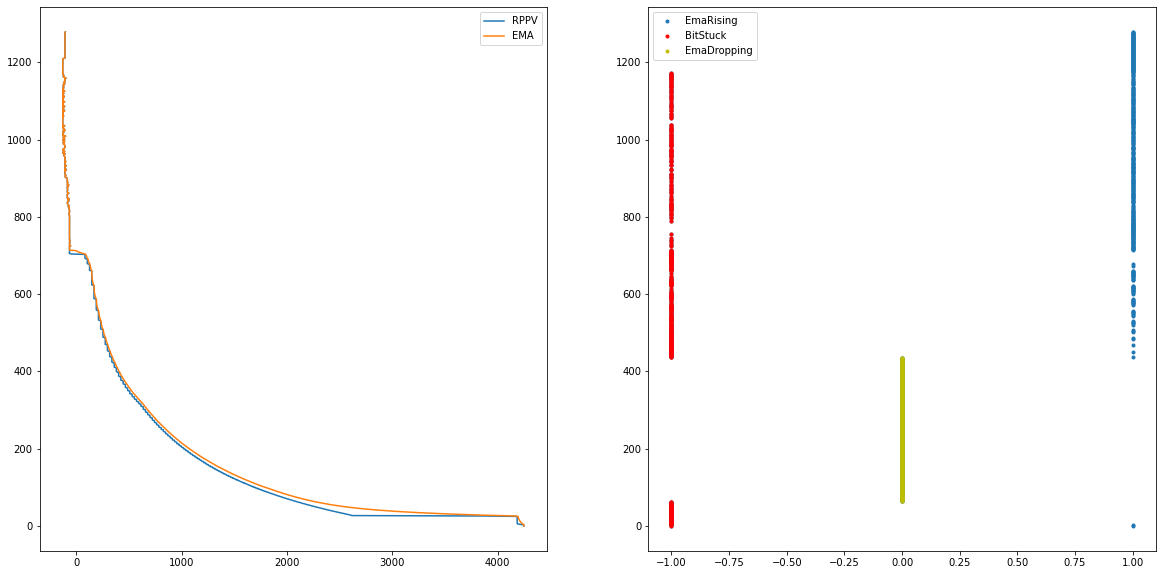

In [12]:
from bsp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bsp1 = BitStuckDetect()

bsp1.Analyze()

#df = pd.read_csv(bsp1.fileAnaPath, sep=',')

#df

#bitstuckdetect = pd.Series( bsp1.seriesBITSTUCKDETECT)

plt.figure(figsize=(20, 10))

plt.ylabel("Elapsed Seconds")

plt.subplot(1, 2, 1)
plt.plot(bsp1.seriesRPPV, bsp1.seriesTime, label = "RPPV")
plt.plot(bsp1.seriesEMA, bsp1.seriesTime, label = "EMA")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bsp1.seriesBITSTUCKDETECT, bsp1.seriesTime, '.', label = "EmaRising")

seriesTimeBitStuck = []
seriesValueBitStuck = []

for i in range(len(bsp1.seriesBITSTUCKDETECT)):
    if bsp1.seriesBITSTUCKDETECT[i] == -1.0:
        seriesValueBitStuck.append(-1.0)
        seriesTimeBitStuck.append(bsp1.seriesTime[i])

plt.plot(seriesValueBitStuck, seriesTimeBitStuck, 'r.', label = "BitStuck")

seriesTimeDmaDropping = []
seriesValueDmaDropping = []

for i in range(len(bsp1.seriesBITSTUCKDETECT)):
    if bsp1.seriesBITSTUCKDETECT[i] == 0.0:
        seriesValueDmaDropping.append(0.0)
        seriesTimeDmaDropping.append(bsp1.seriesTime[i])

plt.plot(seriesValueDmaDropping, seriesTimeDmaDropping, 'y.', label = "EmaDropping")

plt.legend()

plt.show()

